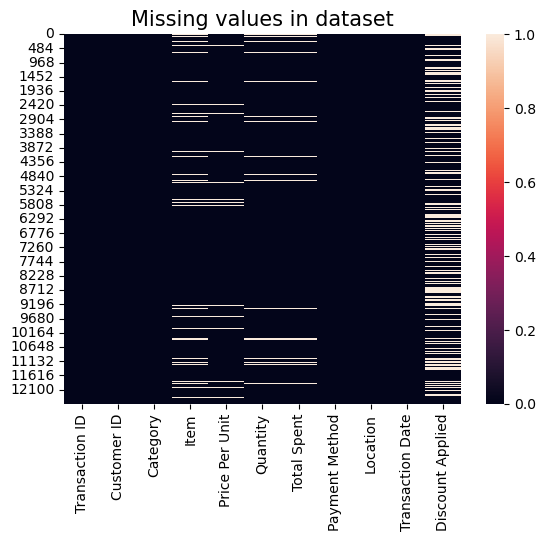

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset=pd.read_csv(r"D:\Downloads\archive\retail_store_sales.csv")
null_values=dataset.isnull()
sns.heatmap(null_values)
plt.title("Missing values in dataset",fontsize=15)
plt.show()

In [3]:
#"Discount Applied" has maximum null values
dataset.drop(columns=["Discount Applied"],inplace=True)

In [4]:
dataset.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02


In [5]:
#"Item" has categorical null values
dataset["Item"].fillna(dataset["Item"].mode()[0],inplace=True)

C:\Users\MANYA SHARMA\AppData\Local\Temp\ipykernel_7320\1454971092.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Item"].fillna(dataset["Item"].mode()[0],inplace=True)


In [6]:
#dealing with "Price per Unit", "Quantity", "Total Spent"
#all are of float datatype
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="mean")
array=["Price Per Unit", "Quantity", "Total Spent"]
dataset[array]=si.fit_transform(dataset[array])
dataset.isnull().sum()

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

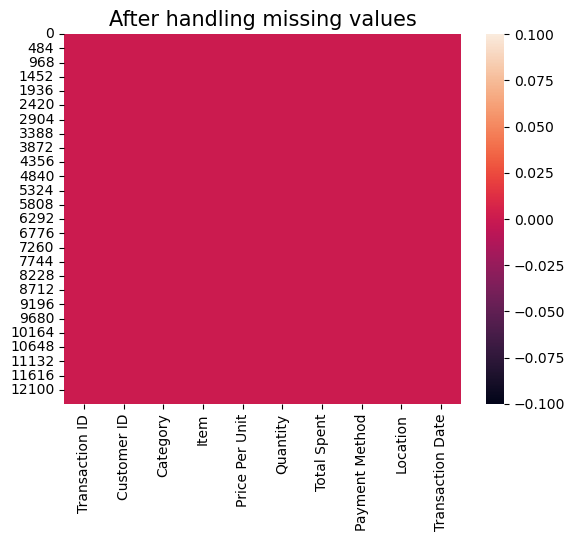

In [7]:
sns.heatmap(dataset.isnull())
plt.title("After handling missing values",fontsize=15)
plt.show()

In [8]:
#ONE HOT ENCODING of "payment method", "location"
en_data=dataset[["Payment Method","Location"]]
pd.get_dummies(en_data)

,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Digital Wallet,Location_In-store,Location_Online
0,False,False,True,False,True
1,False,False,True,False,True
2,False,True,False,False,True
3,False,True,False,False,True
4,False,False,True,False,True
...,...,...,...,...,...
12570,False,True,False,True,False
12571,True,False,False,False,True
12572,True,False,False,False,True
12573,True,False,False,False,True


In [9]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
array=ohe.fit_transform(en_data).toarray()
en_dataset=pd.DataFrame(array,columns=["Payment Method_Cash","Payment Method_Credit Card","Payment Method_Digital Wallet","Location_In-store","Location_Online"])
en_dataset

,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Digital Wallet,Location_In-store,Location_Online
0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...
12570,0.0,1.0,0.0,1.0,0.0
12571,1.0,0.0,0.0,0.0,1.0
12572,1.0,0.0,0.0,0.0,1.0
12573,1.0,0.0,0.0,0.0,1.0


In [10]:
#incorporating en_dataset with dataset:
dataset=dataset.reset_index(drop=True)
dataset=pd.concat([dataset,en_dataset],axis=1)
dataset.drop(columns=["Payment Method", "Location"], inplace=True)
dataset.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Transaction Date,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Digital Wallet,Location_In-store,Location_Online
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,2024-04-08,0.0,0.0,1.0,0.0,1.0
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,2023-07-23,0.0,0.0,1.0,0.0,1.0
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,2022-10-05,0.0,1.0,0.0,0.0,1.0
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,2022-05-07,0.0,1.0,0.0,0.0,1.0
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,2022-10-02,0.0,0.0,1.0,0.0,1.0


In [11]:
#Transaction ID and Customer ID: These are random identifiers. Encoding them doesn't help the model learn patterns; it just creates noise.
#Transaction Date: Most models can't read date strings. You would usually extract the "Month" or "Day of Week" before encoding it.

In [12]:
#Label encoding for items
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
dataset["Item"]=la.fit_transform(dataset["Item"])
dataset.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Transaction Date,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Digital Wallet,Location_In-store,Location_Online
0,TXN_6867343,CUST_09,Patisserie,7,18.5,10.0,185.0,2024-04-08,0.0,0.0,1.0,0.0,1.0
1,TXN_3731986,CUST_22,Milk Products,62,29.0,9.0,261.0,2023-07-23,0.0,0.0,1.0,0.0,1.0
2,TXN_9303719,CUST_02,Butchers,17,21.5,2.0,43.0,2022-10-05,0.0,1.0,0.0,0.0,1.0
3,TXN_9458126,CUST_06,Beverages,48,27.5,9.0,247.5,2022-05-07,0.0,1.0,0.0,0.0,1.0
4,TXN_4575373,CUST_05,Food,172,12.5,7.0,87.5,2022-10-02,0.0,0.0,1.0,0.0,1.0


In [13]:
#Ordinal Encoding for category
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
dataset["Category"]=oe.fit_transform(dataset[["Category"]])
# Ordinal encoder expects a 2D array, so we use double brackets [[]]
dataset.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Transaction Date,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Digital Wallet,Location_In-store,Location_Online
0,TXN_6867343,CUST_09,7.0,7,18.5,10.0,185.0,2024-04-08,0.0,0.0,1.0,0.0,1.0
1,TXN_3731986,CUST_22,6.0,62,29.0,9.0,261.0,2023-07-23,0.0,0.0,1.0,0.0,1.0
2,TXN_9303719,CUST_02,1.0,17,21.5,2.0,43.0,2022-10-05,0.0,1.0,0.0,0.0,1.0
3,TXN_9458126,CUST_06,0.0,48,27.5,9.0,247.5,2022-05-07,0.0,1.0,0.0,0.0,1.0
4,TXN_4575373,CUST_05,4.0,172,12.5,7.0,87.5,2022-10-02,0.0,0.0,1.0,0.0,1.0


In [14]:
#DETECTING OUTLIER
dataset.describe()

,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Digital Wallet,Location_In-store,Location_Online
count,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000
mean,3.496143,101.455189,23.365912,5.536380,129.652577,0.342744,0.327714,0.329543,0.494712,0.505288
std,2.282247,55.684993,10.480118,2.788398,92.446987,0.474645,0.469399,0.470066,0.499992,0.499992
min,0.000000,0.000000,5.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,53.000000,14.000000,3.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,107.000000,23.365912,5.536380,112.500000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,141.000000,32.000000,8.000000,184.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,7.000000,199.000000,41.000000,10.000000,410.000000,1.000000,1.000000,1.000000,1.000000,1.000000


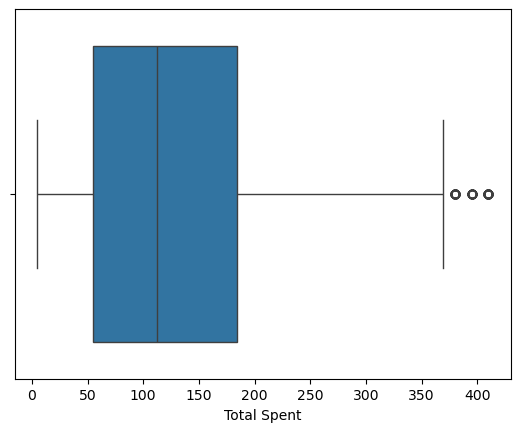

In [15]:
sns.boxplot(x="Total Spent",data=dataset)
plt.show()
#Dots represent outlier

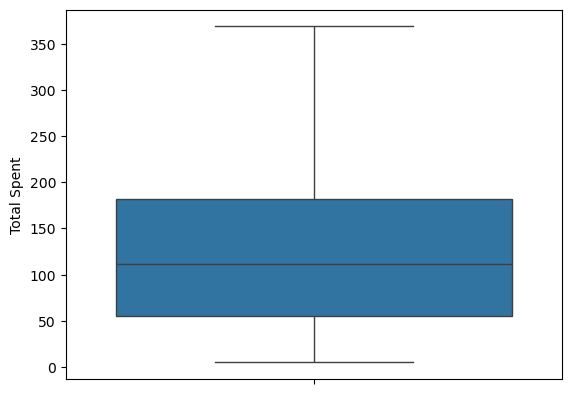

In [16]:
#removal using IQR
q1=dataset["Total Spent"].quantile(0.25)
q3=dataset["Total Spent"].quantile(0.75)
IQR=q3-q1
min_range=q1 - (1.5*IQR)
max_range=q3 + (1.5*IQR)
dataset=dataset[(dataset["Total Spent"]>= min_range) & (dataset["Total Spent"]<= max_range)]
sns.boxplot(dataset["Total Spent"])
plt.show()

In [17]:
#Feature scaling ensures your numerical features contribute equally to the model's learning process.
dataset.describe()

,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Digital Wallet,Location_In-store,Location_Online
count,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000
mean,3.498309,101.167740,23.173381,5.479946,126.295390,0.343292,0.327428,0.329280,0.494605,0.505395
std,2.281588,55.970877,10.394909,2.760140,88.031601,0.474827,0.469294,0.469971,0.499991,0.499991
min,0.000000,0.000000,5.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,52.000000,14.000000,3.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,106.000000,23.365912,5.536380,112.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,141.000000,32.000000,8.000000,182.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,7.000000,199.000000,41.000000,10.000000,369.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#Standardization of "Price Per Unit","Quantity","Total Spent"
#Z-Score scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaler_columns=["Price Per Unit", "Quantity", "Total Spent"]
dataset[scaler_columns]=ss.fit_transform(dataset[scaler_columns])
dataset.describe()

,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Digital Wallet,Location_In-store,Location_Online
count,12418.000000,12418.000000,1.241800e+04,1.241800e+04,1.241800e+04,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000
mean,3.498309,101.167740,-2.105651e-16,-1.768775e-16,-2.048432e-16,0.343292,0.327428,0.329280,0.494605,0.505395
std,2.281588,55.970877,1.000040e+00,1.000040e+00,1.000040e+00,0.474827,0.469294,0.469971,0.499991,0.499991
min,0.000000,0.000000,-1.748367e+00,-1.623152e+00,-1.377917e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,52.000000,-8.825234e-01,-8.985220e-01,-8.099167e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,106.000000,1.852237e-02,2.044663e-02,-1.623958e-01,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,141.000000,8.491632e-01,9.130535e-01,6.328052e-01,1.000000,1.000000,1.000000,1.000000,1.000000
max,7.000000,199.000000,1.715006e+00,1.637684e+00,2.757128e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
#Normalization or MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
scaler_columns=["Price Per Unit", "Quantity", "Total Spent"]
dataset[scaler_columns]=mms.fit_transform(dataset[scaler_columns])
dataset.describe()

,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Digital Wallet,Location_In-store,Location_Online
count,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000
mean,3.498309,101.167740,0.504816,0.497772,0.333229,0.343292,0.327428,0.329280,0.494605,0.505395
std,2.281588,55.970877,0.288747,0.306682,0.241845,0.474827,0.469294,0.469971,0.499991,0.499991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,52.000000,0.250000,0.222222,0.137363,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,106.000000,0.510164,0.504042,0.293956,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,141.000000,0.750000,0.777778,0.486264,1.000000,1.000000,1.000000,1.000000,1.000000
max,7.000000,199.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# This must be in the same notebook where you cleaned the data
dataset.to_csv("cleaned_retail_sales.csv", index=False)
print("File saved successfully!")

File saved successfully!
